In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr

'''
Try to use Zack's ON/OFF clusters to match with original data, grab index numbers.
Use Pearson Correlation to get matches from representative calcium traces, 4 motor clusters
Explore Neuropal dataset, to verify cell id of hypothesized clusters
'''

"\nTry to use Zack's ON/OFF clusters to match with original data, grab index numbers.\nUse Pearson Correlation to get matches from representative calcium traces, 4 motor clusters\nExplore Neuropal dataset, to verify cell id of hypothesized clusters\n"

In [240]:
stimulus = np.load('ProcAiryData/inpfull_op50_SF.npz')

In [241]:

ON_cells = np.load('ProcAiryData/Yop50_SF_psON.npz')
OFF_cells = np.load('ProcAiryData/Yop50_SF_psOFF.npz')
Y_full = np.load('ProcAiryData/Yfull_op50_SF.npz')

In [242]:
stimulus_concat = np.concatenate([stimulus['arr_0'], stimulus['arr_1'], stimulus['arr_2'], stimulus['arr_3'], stimulus['arr_4'], stimulus['arr_5'], stimulus['arr_6']], axis =1)

In [246]:
#maybe the clustered data, no corresponding annotations

yanno = np.load('ProcAiryData/Yanno_op50_SF.npz')

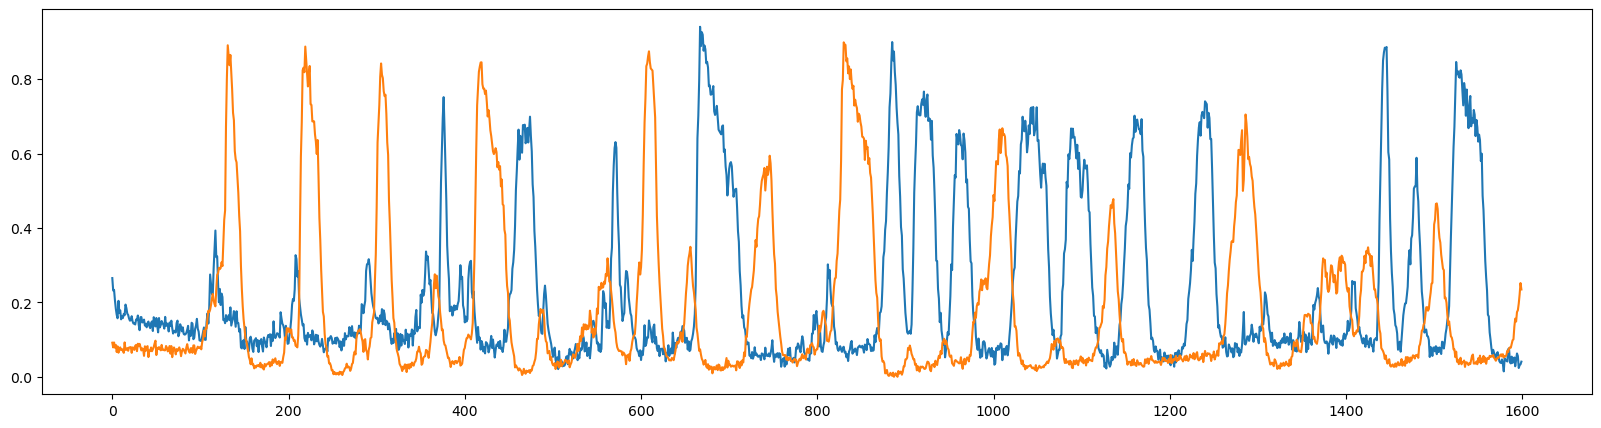

In [358]:

fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(range (1600),yanno['arr_6'][:, 2] ) #blue
ax.plot(range (1600),yanno['arr_6'][:, 3] ) #orange 
# ax.plot( stimulus['arr_6'])

In [322]:
yanno_full = np.concatenate([yanno['arr_0'], yanno['arr_1'], yanno['arr_2'], yanno['arr_3'], yanno['arr_4'], yanno['arr_5'], yanno['arr_6']], axis = 1 )

In [323]:
yanno_full_df = pd.DataFrame(yanno_full.T)

In [330]:

correlations_yanno = []
for i in range(0, yanno_full_df.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[11, :], yanno_full_df.iloc[i, :])
    correlations_yanno.append((i, corr))  # Store tuple of (row index, correlation)

In [331]:

correlations_yanno

[(0, -0.08821867392668994),
 (1, 0.056419172873001217),
 (2, 0.15088116232633325),
 (3, -0.009220865321369386),
 (4, -0.018809086865800843),
 (5, -0.06678429880494309),
 (6, -0.00530629341740003),
 (7, 0.03730447574270025),
 (8, -0.07420757047756722),
 (9, 0.014529094256926337),
 (10, 0.08342598369371661),
 (11, 0.004401923307133184),
 (12, -0.22375392400509156),
 (13, 0.3933677128622216),
 (14, 0.9999999999999992),
 (15, -0.4122221798427145),
 (16, -0.070577202520202),
 (17, 0.06691014323239684),
 (18, 0.06914728504711938),
 (19, -0.058969215837501227),
 (20, 0.05308974705273239),
 (21, -0.09574460825450995),
 (22, -0.0500972940200604),
 (23, -0.0406377489565077),
 (24, 0.12670432177787666),
 (25, 0.0033591653064725573),
 (26, -0.1077820644759993),
 (27, 0.004198276142170587)]

In [23]:

#Exploring the Neuropal data

neuropal = np.load('ProcAiryData/Yfull_Neuropal.npz')

In [243]:
Y_full_concat = np.concatenate([Y_full['arr_0'],
                         Y_full['arr_1'],
                         Y_full['arr_2'],
                         Y_full['arr_3'] , Y_full['arr_4'], Y_full['arr_5'], Y_full['arr_6']], axis =1)

Y_full_df = pd.DataFrame(Y_full_concat)


# all_worms = np.concatenate([bacteria['arr_0'], bacteria['arr_1'], bacteria['arr_2'],
#                             bacteria['arr_3'], bacteria['arr_4'], bacteria['arr_5'],
#                             bacteria['arr_6']], axis=1)

In [244]:
Y_full_concat.shape

(1600, 948)

In [245]:
stim_df = pd.DataFrame(stimulus_concat)


In [108]:
#function test to prep for MNE s variable generation

def get_bins(stimulus, response, bin_size, start_idx, cell_idx, num_bins = 10):
    response_vector = []
    stimulus_vector = []
    stimulus_matrix = ((num_bins, bin_size))

    if start_idx < num_bins * bin_size:
        print("Start index is out of bounds.")
        return None
    start = response[cell_idx,  start_idx: start_idx + 10] 
    response_vector.append(start)
    end = start_idx - (bin_size * num_bins)
    print('end', end)
    print("resp", response_vector)
    stimulus_vector.append(stimulus[ 0, end : start_idx ])
    print("stim", stimulus_vector)
    stimulus_vector = np.array(stimulus_vector)
    stimulus_matrix = stimulus_vector.reshape((num_bins, bin_size))
    return stimulus_matrix, np.array(response_vector)
    


In [109]:
stimulus_matrix, response_vector = get_bins(stimulus = stimulus_concat.T, response = Y_full_concat.T, bin_size = 10, start_idx= 400, cell_idx = 0, num_bins = 10)

end 300
resp [array([0.01811616, 0.0193677 , 0.02122734, 0.02012054, 0.02539671,
       0.0223045 , 0.01799833, 0.01557581, 0.01570844, 0.02203154])]
stim [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]


In [110]:
#another version but this time with chatgpt
def get_bins_avg(stimulus, response, bin_size, start_idx, cell_idx, num_bins=10, nsamples=10):
    response_vector = []
    stimulus_vector = []
    if start_idx >= len(response[cell_idx]) - bin_size * num_bins:
        print("Start index is out of bounds.")
        return None
    for _ in range(nsamples):
        r = response[cell_idx, start_idx: start_idx + bin_size]
        response_vector.append(np.average(r))

        bin_stimuli = []
        for i in range(num_bins):
           
            end_idx = (start_idx + bin_size) - (i * bin_size)
            start_idx_bin = end_idx + bin_size

            # Check if the calculated index is within the bounds
            if start_idx_bin < 0:
                break

            # Append the average of stimulus over the bin
            bin_stimuli.append(np.average(stimulus[0, start_idx_bin:end_idx]))

        # Collect all averages per sample
        stimulus_vector.append(bin_stimuli)

        # Update start index for the next sample
        start_idx += bin_size

    # Convert list of lists into a 2D NumPy array
    stimulus_matrix = np.array(stimulus_vector).T  # Transpose to match expected dimensions

    return stimulus_matrix, np.array(response_vector)

In [111]:
stimulus_matrix, response_vector = get_bins_avg(stimulus = stimulus_concat.T, response = Y_full_concat.T, bin_size = 10, start_idx= 400, cell_idx = 0, num_bins = 10)

/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [112]:
response_vector


array([0.01978471, 0.01866427, 0.01730471, 0.01482894, 0.01823257,
       0.02567192, 0.03449077, 0.02379703, 0.02297237, 0.01889341])

In [113]:
Y_full['arr_0'].shape

(1600, 133)

In [114]:
column = [0] * len(Y_full['arr_0'].T) + [1] * len(Y_full['arr_1'].T) + [2] * len(Y_full['arr_2'].T) + [3] * len(Y_full['arr_3'].T) + [4] * len(Y_full['arr_4'].T) + [5] * len(Y_full['arr_5'].T) + [6] * len(Y_full['arr_6'].T)
worm_id = np.array(column)

In [115]:
Y_full_df = Y_full_df.T

In [116]:
Y_full_df['worm_id'] = worm_id


In [117]:
Y_full_df

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,worm_id
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010324,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325,0
1,0.976775,0.991876,0.959301,0.965111,1.000000,0.866721,0.973716,0.923286,0.930305,0.918496,...,0.449743,0.472877,0.476172,0.437171,0.449895,0.442183,0.454118,0.467614,0.439026,0
2,1.000000,0.935644,0.849705,0.845024,0.842825,0.796130,0.830378,0.804948,0.761474,0.780609,...,0.362794,0.330972,0.342765,0.340209,0.350782,0.289997,0.341319,0.324467,0.307941,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016547,0.022308,0.021005,0.025381,0.005841,0.004750,0.016866,0.017452,0.028150,0
4,0.006261,0.006576,0.010239,0.005997,0.007404,0.024813,0.017438,0.033881,0.013081,0.004452,...,0.360048,0.367689,0.421811,0.411161,0.503685,0.509207,0.513564,0.600296,0.730846,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.312603,0.373691,0.449884,0.211660,0.296990,0.187166,0.155247,0.316095,0.315492,0.300387,...,0.791626,0.885284,0.670388,0.661178,0.734529,0.851483,0.804422,0.742671,0.777773,6
944,0.339387,0.229637,0.216102,0.259927,0.271875,0.270550,0.188673,0.265596,0.249477,0.192825,...,0.817934,0.982645,1.000000,0.890944,0.841802,0.882466,0.844906,0.699990,0.825467,6
945,0.609380,0.697251,0.636031,0.447529,0.618746,0.642954,0.630861,0.547182,0.689178,0.635459,...,0.806628,0.794571,0.945617,0.774464,0.810107,0.714264,0.899256,0.821404,0.950433,6
946,0.647262,0.867968,0.824434,0.814158,0.832059,0.911042,0.729391,1.000000,0.675456,0.825304,...,0.325846,0.112071,0.324665,0.324407,0.237952,0.371768,0.252458,0.312875,0.207396,6


In [118]:
#add stimulus group to Y_full_df
stim_g = [0] * len(Y_full['arr_0'].T) + [0] * len(Y_full['arr_1'].T) + [1] * len(Y_full['arr_2'].T) + [1] * len(Y_full['arr_3'].T) + [1] * len(Y_full['arr_4'].T) + [1] * len(Y_full['arr_5'].T) + [0] * len(Y_full['arr_6'].T)
stim_group = np.array(stim_g)

In [119]:
Y_full_df['stim_group'] = stim_group

In [120]:
Y_full_df

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325,0,0
1,0.976775,0.991876,0.959301,0.965111,1.000000,0.866721,0.973716,0.923286,0.930305,0.918496,...,0.472877,0.476172,0.437171,0.449895,0.442183,0.454118,0.467614,0.439026,0,0
2,1.000000,0.935644,0.849705,0.845024,0.842825,0.796130,0.830378,0.804948,0.761474,0.780609,...,0.330972,0.342765,0.340209,0.350782,0.289997,0.341319,0.324467,0.307941,0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022308,0.021005,0.025381,0.005841,0.004750,0.016866,0.017452,0.028150,0,0
4,0.006261,0.006576,0.010239,0.005997,0.007404,0.024813,0.017438,0.033881,0.013081,0.004452,...,0.367689,0.421811,0.411161,0.503685,0.509207,0.513564,0.600296,0.730846,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.312603,0.373691,0.449884,0.211660,0.296990,0.187166,0.155247,0.316095,0.315492,0.300387,...,0.885284,0.670388,0.661178,0.734529,0.851483,0.804422,0.742671,0.777773,6,0
944,0.339387,0.229637,0.216102,0.259927,0.271875,0.270550,0.188673,0.265596,0.249477,0.192825,...,0.982645,1.000000,0.890944,0.841802,0.882466,0.844906,0.699990,0.825467,6,0
945,0.609380,0.697251,0.636031,0.447529,0.618746,0.642954,0.630861,0.547182,0.689178,0.635459,...,0.794571,0.945617,0.774464,0.810107,0.714264,0.899256,0.821404,0.950433,6,0
946,0.647262,0.867968,0.824434,0.814158,0.832059,0.911042,0.729391,1.000000,0.675456,0.825304,...,0.112071,0.324665,0.324407,0.237952,0.371768,0.252458,0.312875,0.207396,6,0


In [121]:
sensory_concat = np.concatenate([ON_cells['arr_0'], ON_cells['arr_1'], ON_cells['arr_2'], ON_cells['arr_3'], ON_cells['arr_4'], ON_cells['arr_5'], ON_cells['arr_6'],
                                  OFF_cells['arr_0'], OFF_cells['arr_1'], OFF_cells['arr_2'], OFF_cells['arr_3'], OFF_cells['arr_4'], OFF_cells['arr_5'], OFF_cells['arr_6']], axis = 1)

sensory_df = pd.DataFrame(sensory_concat)

In [122]:
Y_full_df.shape

(948, 1602)

In [123]:
sensory_df.shape

(1600, 51)

In [125]:


# Merge the DataFrames on columns 'A' and 'B'
merged_df = pd.merge(Y_full_df.iloc[:, : -2], sensory_df.T, how='outer', indicator = True)

# Display the merged DataFrame
print(merged_df)



left_only = merged_df[merged_df['_merge'] == 'left_only']





       0         1         2         3         4         5         6  \
0    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..   ...       ...       ...       ...       ...       ...       ...   
943  1.0  0.989704  0.944525  0.908084  0.843754  0.864612  0.837278   
944  1.0  0.991301  0.970714  0.913606  0.962348  0.770225  0.882988   
945  1.0  0.992013  0.957409  0.922561  0.777735  0.658081  0.529483   
946  1.0  0.992437  0.915646  0.869705  0.818588  0.865677  0.879607   
947  1.0  0.999326  0.896468  0.921065  0.925678  0.642147  0.890337   

            7         8         9  ...      1591      1592      1593  \
0    0.000000  0.000000  0.000000  ...  0.505346  0.511284  0.4

In [129]:
both = merged_df[merged_df['_merge'] == 'both']

In [130]:
both

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,_merge
92,0.007268,0.010954,0.037007,0.002865,0.020688,0.024091,0.016025,0.086438,0.027677,0.065741,...,0.000000,0.092301,0.000000,0.087930,0.000000,0.064883,0.112134,0.160932,0.000000,both
141,0.042902,0.061919,0.038616,0.020661,0.063261,0.042086,0.042280,0.043554,0.063474,0.029278,...,0.327123,0.268349,0.265157,0.287717,0.259648,0.283492,0.231142,0.255243,0.201483,both
143,0.044767,0.034356,0.054277,0.060201,0.064883,0.034744,0.045008,0.051906,0.079890,0.073879,...,0.009675,0.019260,0.010417,0.014744,0.000000,0.010609,0.025992,0.030069,0.026731,both
157,0.051226,0.097647,0.104268,0.114717,0.098219,0.079975,0.070228,0.074329,0.068534,0.068865,...,0.047185,0.045663,0.012079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000409,both
166,0.058262,0.086767,0.081537,0.076845,0.070099,0.081335,0.054870,0.060780,0.080764,0.076667,...,0.021008,0.003032,0.000000,0.012079,0.016968,0.020956,0.017370,0.014025,0.015286,both
169,0.059893,0.077135,0.078309,0.074547,0.087966,0.068480,0.106638,0.063616,0.110894,0.078691,...,0.253618,0.229370,0.231311,0.239211,0.195642,0.191159,0.210878,0.195020,0.195396,both
174,0.067608,0.076400,0.083592,0.069296,0.086243,0.072263,0.073743,0.054932,0.059659,0.081850,...,0.079332,0.095291,0.106757,0.142643,0.171139,0.212862,0.268534,0.178100,0.120161,both
185,0.073245,0.078041,0.101136,0.097770,0.070143,0.089184,0.103075,0.072258,0.083143,0.090620,...,0.107907,0.135058,0.149525,0.186902,0.225515,0.251903,0.245917,0.210967,0.172567,both
192,0.077771,0.050388,0.038936,0.063386,0.057993,0.087070,0.068161,0.045648,0.060495,0.052107,...,0.070857,0.074979,0.084153,0.108473,0.132419,0.153624,0.178262,0.162290,0.148391,both
194,0.080219,0.064809,0.066301,0.031171,0.053962,0.069359,0.059205,0.064676,0.084366,0.110546,...,0.058153,0.058390,0.041855,0.037438,0.039988,0.052700,0.059330,0.046315,0.044140,both


In [131]:
index_array = np.array(both.index)

In [132]:
index_array

array([ 92, 141, 143, 157, 166, 169, 174, 185, 192, 194, 209, 214, 232,
       248, 256, 258, 262, 273, 275, 276, 286, 292, 302, 312, 313, 316,
       323, 333, 339, 340, 343, 356, 369, 375, 406, 444, 445, 449, 454,
       460, 487, 580, 588, 598, 617, 625, 633, 636, 643, 758, 899])

In [133]:

# Create a mask where True indicates indices NOT to be removed: tilda ~ inverts the mask
mask = ~Y_full_df.index.isin(index_array)

# Filter the DataFrame to keep only rows not in index_array
Y_full_filtered = Y_full_df[mask]

# Print the updated DataFrame
Y_full_filtered.shape


(897, 1602)

In [136]:
#perform same mask to get sensory data full

mask2 = Y_full_df.index.isin(index_array)

# Filter the DataFrame to keep only rows in index_array
Y_full_sensory_df = Y_full_df[mask2]

In [137]:
Y_full_sensory_df

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
92,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005129,0.000000,0.000000,0.000000,0,0
141,0.010361,0.019937,0.000000,0.007152,0.000000,0.004247,0.000000,0.011453,0.000000,0.000000,...,0.064569,0.058819,0.076884,0.054709,0.055094,0.041878,0.047133,0.054559,1,0
143,0.067608,0.076400,0.083592,0.069296,0.086243,0.072263,0.073743,0.054932,0.059659,0.081850,...,0.095291,0.106757,0.142643,0.171139,0.212862,0.268534,0.178100,0.120161,1,0
157,0.898445,1.000000,0.938769,0.881705,0.971901,0.882082,0.847814,0.885770,0.861531,0.832652,...,0.051095,0.031141,0.057871,0.051533,0.047803,0.039355,0.033866,0.053829,1,0
166,0.237012,0.140203,0.018907,0.172073,0.121531,0.122144,0.158685,0.123706,0.065837,0.101011,...,0.000000,0.000919,0.000000,0.000000,0.000000,0.000000,0.040633,0.000000,1,0
169,0.716307,0.705902,0.564898,0.441466,0.444028,0.311968,0.352555,0.226823,0.187270,0.184969,...,0.067447,0.065018,0.071343,0.046652,0.065481,0.054354,0.071688,0.060553,1,0
174,0.121134,0.132084,0.077399,0.127247,0.065939,0.098661,0.087294,0.075573,0.065676,0.015753,...,0.587067,0.627846,0.610968,0.671609,0.631025,0.660324,0.587649,0.578051,1,0
185,0.039777,0.058109,0.028702,0.012327,0.068438,0.105573,0.169366,0.108623,0.146604,0.198209,...,0.000000,0.022552,0.001640,0.000000,0.012879,0.000000,0.000000,0.024060,1,0
192,0.123334,0.114243,0.156110,0.118286,0.123836,0.131926,0.158052,0.132808,0.139767,0.162605,...,0.069008,0.075413,0.069472,0.079777,0.079524,0.087750,0.078156,0.012485,1,0
194,0.414714,0.562640,0.437308,0.539690,0.560167,0.511459,0.563257,0.548349,0.698510,0.555115,...,0.234558,0.330694,0.094433,0.166514,0.269306,0.189942,0.164141,0.253325,1,0


In [142]:
Y_full_sensory_df.iloc[:, :-2]

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
92,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005129,0.000000,0.000000,0.000000
141,0.010361,0.019937,0.000000,0.007152,0.000000,0.004247,0.000000,0.011453,0.000000,0.000000,...,0.085720,0.074736,0.064569,0.058819,0.076884,0.054709,0.055094,0.041878,0.047133,0.054559
143,0.067608,0.076400,0.083592,0.069296,0.086243,0.072263,0.073743,0.054932,0.059659,0.081850,...,0.103576,0.079332,0.095291,0.106757,0.142643,0.171139,0.212862,0.268534,0.178100,0.120161
157,0.898445,1.000000,0.938769,0.881705,0.971901,0.882082,0.847814,0.885770,0.861531,0.832652,...,0.057719,0.047759,0.051095,0.031141,0.057871,0.051533,0.047803,0.039355,0.033866,0.053829
166,0.237012,0.140203,0.018907,0.172073,0.121531,0.122144,0.158685,0.123706,0.065837,0.101011,...,0.000000,0.079117,0.000000,0.000919,0.000000,0.000000,0.000000,0.000000,0.040633,0.000000
169,0.716307,0.705902,0.564898,0.441466,0.444028,0.311968,0.352555,0.226823,0.187270,0.184969,...,0.054303,0.059776,0.067447,0.065018,0.071343,0.046652,0.065481,0.054354,0.071688,0.060553
174,0.121134,0.132084,0.077399,0.127247,0.065939,0.098661,0.087294,0.075573,0.065676,0.015753,...,0.601098,0.609833,0.587067,0.627846,0.610968,0.671609,0.631025,0.660324,0.587649,0.578051
185,0.039777,0.058109,0.028702,0.012327,0.068438,0.105573,0.169366,0.108623,0.146604,0.198209,...,0.013077,0.011398,0.000000,0.022552,0.001640,0.000000,0.012879,0.000000,0.000000,0.024060
192,0.123334,0.114243,0.156110,0.118286,0.123836,0.131926,0.158052,0.132808,0.139767,0.162605,...,0.075607,0.022656,0.069008,0.075413,0.069472,0.079777,0.079524,0.087750,0.078156,0.012485
194,0.414714,0.562640,0.437308,0.539690,0.560167,0.511459,0.563257,0.548349,0.698510,0.555115,...,0.230861,0.258043,0.234558,0.330694,0.094433,0.166514,0.269306,0.189942,0.164141,0.253325


In [146]:
stimulus_concat.T.shape

(7, 1600)

In [147]:
Y_full_sensory_df.shape

(51, 1602)

In [162]:
Y_full_sensory_array = np.array(Y_full_sensory_df.iloc[:, :-2])

In [174]:
stimulus_concat.T.shape

(7, 1600)

In [196]:
stimulus_concat.T[0, 210:200]

array([], dtype=float64)

In [229]:
def get_bins_avg(stimulus, response, bin_size, start_idx, cell_idx, num_bins=10, nsamples=10):
    response_vector = []
    stimulus_vector = []
    for _ in range(nsamples):
        r = response[cell_idx, start_idx: start_idx + bin_size]
        response_vector.append(np.average(r))
        print('response', response_vector)

        bin_stimuli = []
        for i in range(num_bins):
           
            end_idx = (start_idx ) - (i * bin_size)
            print('start_idx', start_idx)
            print('end', end_idx)
            start_idx_bin = end_idx + bin_size
            print('start_idx_bin', start_idx_bin)

            # Check if the calculated index is within the bounds
            if start_idx_bin < 0:
                break

            # Append the average of stimulus over the bin
            bin_stimuli.append(np.average(stimulus[0, end_idx:start_idx_bin]))
            print('stim', stimulus[0, start_idx_bin:end_idx])
            print('bin_stimuli', bin_stimuli)

        # Collect all averages per sample
        stimulus_vector.append(bin_stimuli)
        print('stimulus_vector', stimulus_vector)

        # Update start index for the next sample
        start_idx += bin_size

    # Convert list of lists into a 2D NumPy array
    stimulus_matrix = np.array(stimulus_vector)  # Transpose to match expected dimensions

    return stimulus_matrix, np.array(response_vector)

In [235]:
bin_size = 10
start_idx = 200  # Starting index for the stimulus and response extraction
num_bins = 10
nsamples = 100

stimulus = stimulus_concat.T
response = Y_full_sensory_array
cell_idx = 0 #cell in response

data, label = get_bins_avg(stimulus, response, bin_size, start_idx, cell_idx, num_bins, nsamples)
# Loop over each cell index in the DataFrame


response [0.5773142332120611]
start_idx 200
end 200
start_idx_bin 210
stim []
bin_stimuli [0.0]
start_idx 200
end 190
start_idx_bin 200
stim []
bin_stimuli [0.0, 1.0]
start_idx 200
end 180
start_idx_bin 190
stim []
bin_stimuli [0.0, 1.0, 1.0]
start_idx 200
end 170
start_idx_bin 180
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0]
start_idx 200
end 160
start_idx_bin 170
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0]
start_idx 200
end 150
start_idx_bin 160
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
start_idx 200
end 140
start_idx_bin 150
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
start_idx 200
end 130
start_idx_bin 140
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
start_idx 200
end 120
start_idx_bin 130
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
start_idx 200
end 110
start_idx_bin 120
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
stimulus_vector [[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]]
response [0.5773

In [238]:
label.shape

(100,)

In [152]:
Y_full_filtered

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325,0,0
1,0.976775,0.991876,0.959301,0.965111,1.000000,0.866721,0.973716,0.923286,0.930305,0.918496,...,0.472877,0.476172,0.437171,0.449895,0.442183,0.454118,0.467614,0.439026,0,0
2,1.000000,0.935644,0.849705,0.845024,0.842825,0.796130,0.830378,0.804948,0.761474,0.780609,...,0.330972,0.342765,0.340209,0.350782,0.289997,0.341319,0.324467,0.307941,0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022308,0.021005,0.025381,0.005841,0.004750,0.016866,0.017452,0.028150,0,0
4,0.006261,0.006576,0.010239,0.005997,0.007404,0.024813,0.017438,0.033881,0.013081,0.004452,...,0.367689,0.421811,0.411161,0.503685,0.509207,0.513564,0.600296,0.730846,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.312603,0.373691,0.449884,0.211660,0.296990,0.187166,0.155247,0.316095,0.315492,0.300387,...,0.885284,0.670388,0.661178,0.734529,0.851483,0.804422,0.742671,0.777773,6,0
944,0.339387,0.229637,0.216102,0.259927,0.271875,0.270550,0.188673,0.265596,0.249477,0.192825,...,0.982645,1.000000,0.890944,0.841802,0.882466,0.844906,0.699990,0.825467,6,0
945,0.609380,0.697251,0.636031,0.447529,0.618746,0.642954,0.630861,0.547182,0.689178,0.635459,...,0.794571,0.945617,0.774464,0.810107,0.714264,0.899256,0.821404,0.950433,6,0
946,0.647262,0.867968,0.824434,0.814158,0.832059,0.911042,0.729391,1.000000,0.675456,0.825304,...,0.112071,0.324665,0.324407,0.237952,0.371768,0.252458,0.312875,0.207396,6,0


In [471]:

# Create a boolean mask where the condition is met
worm_mask = Y_full_filtered['worm_id'] == 5

# Filter the DataFrame using the mask
worm_filter5 = Y_full_filtered[worm_mask]

In [468]:
worm_filter5.shape

(136, 1602)

In [473]:
# Create a boolean mask where the condition is met
worm_mask = Y_full_filtered['worm_id'] == 4

# Filter the DataFrame using the mask
worm_filter4 = Y_full_filtered[worm_mask]

In [474]:
# Create a boolean mask where the condition is met
worm_mask = Y_full_filtered['worm_id'] == 3

# Filter the DataFrame using the mask
worm_filter3 = Y_full_filtered[worm_mask]

In [622]:
# Create a boolean mask where the condition is met
worm_mask = Y_full_filtered['worm_id'] == 2

# Filter the DataFrame using the mask
worm_filter2 = Y_full_filtered[worm_mask]

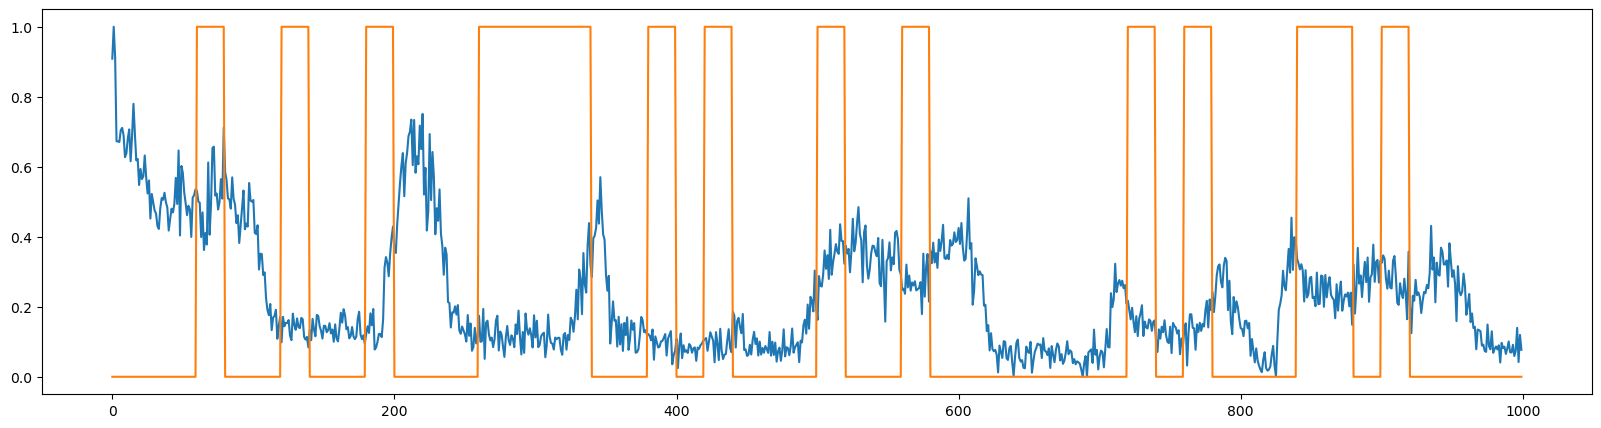

In [472]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(range (1000), worm_filter5.iloc[55, 0: 1000])
ax.plot( stimulus['arr_2'][0: 1000])





In [290]:
yanno['arr_0'][0, :].shape

(4,)

In [297]:
yanno['arr_4'].shape

(1600, 4)

In [665]:
stimulus['arr_2']

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [671]:
#try adjusting stimlus to timescale of 1 tick per second
adj_stim = stimulus['arr_2'] * (2/3)

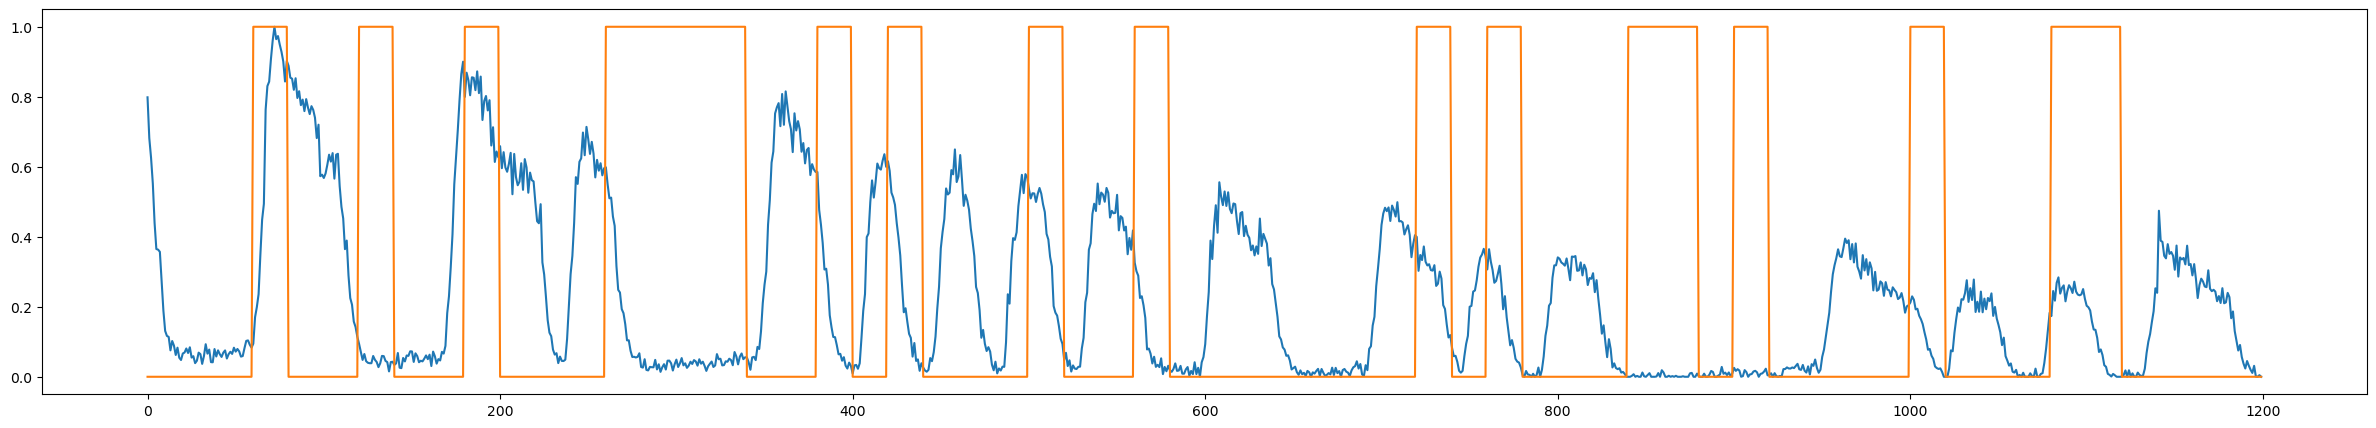

In [742]:
# 6,  9, 34, 35, 41, 58
fig, ax = plt.subplots(figsize = (30, 5))
ax.plot(range (1200), worm_filter2.iloc[58, 0: 1200])
ax.plot( stimulus['arr_2'][0: 1200])

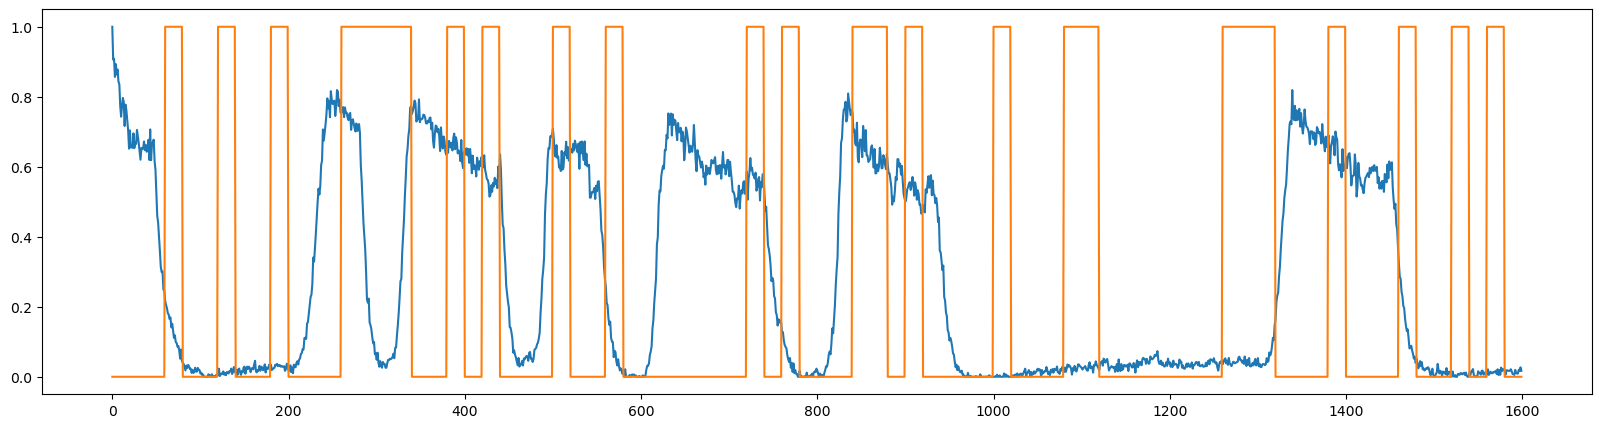

In [448]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(range (1600), yanno['arr_1'][: , 0])
ax.plot(stimulus['arr_2'])

In [713]:
correlations_2_rme = []
for i in range(0, worm_filter2.shape[0]):  # Start from the second row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(worm_filter2.iloc[75, :], worm_filter2.iloc[i, :])
    correlations_2_rme.append((i, corr))  # Store tuple of (row index, correlation)

In [714]:
correlations_2_rme = np.array(correlations_2_rme)

correlations_2_rme

array([[ 0.00000000e+00, -5.31837262e-02],
       [ 1.00000000e+00,  4.49221744e-01],
       [ 2.00000000e+00, -2.09119945e-02],
       [ 3.00000000e+00, -1.06779685e-01],
       [ 4.00000000e+00, -1.93666320e-02],
       [ 5.00000000e+00, -1.02234418e-02],
       [ 6.00000000e+00, -6.28369065e-01],
       [ 7.00000000e+00, -4.24832853e-01],
       [ 8.00000000e+00,  8.09583505e-01],
       [ 9.00000000e+00, -5.80802269e-01],
       [ 1.00000000e+01, -5.77916377e-02],
       [ 1.10000000e+01,  6.74688918e-01],
       [ 1.20000000e+01, -3.19251826e-02],
       [ 1.30000000e+01,  4.15099180e-01],
       [ 1.40000000e+01, -2.39653990e-01],
       [ 1.50000000e+01,  3.33221947e-01],
       [ 1.60000000e+01, -2.24934075e-01],
       [ 1.70000000e+01, -3.88535553e-02],
       [ 1.80000000e+01,  2.10343312e-01],
       [ 1.90000000e+01, -3.06738488e-01],
       [ 2.00000000e+01, -4.93380171e-01],
       [ 2.10000000e+01,  4.50042243e-01],
       [ 2.20000000e+01,  5.37816716e-01],
       [ 2.

In [715]:
correlations_2_rme = np.array(correlations_2_rme[:, 1])


correlations_2_rme

array([-5.31837262e-02,  4.49221744e-01, -2.09119945e-02, -1.06779685e-01,
       -1.93666320e-02, -1.02234418e-02, -6.28369065e-01, -4.24832853e-01,
        8.09583505e-01, -5.80802269e-01, -5.77916377e-02,  6.74688918e-01,
       -3.19251826e-02,  4.15099180e-01, -2.39653990e-01,  3.33221947e-01,
       -2.24934075e-01, -3.88535553e-02,  2.10343312e-01, -3.06738488e-01,
       -4.93380171e-01,  4.50042243e-01,  5.37816716e-01, -2.26105752e-01,
        7.25823053e-01,  6.50408405e-01,  3.02603469e-01,  2.88805152e-01,
       -5.46725165e-02,  1.18893294e-01,  4.44380655e-02, -3.64007705e-01,
       -1.23387030e-01,  3.55605533e-02, -6.10881609e-01, -7.16325003e-01,
        4.08012444e-01,  1.56277446e-01,  1.73572528e-01, -3.37595115e-01,
        4.25832388e-01, -5.09817173e-01, -8.12308154e-02,  2.54798729e-01,
        5.95129011e-01,  1.15794108e-01, -3.10997544e-01, -4.71673475e-01,
       -1.51583139e-02,  4.07276424e-01, -3.00930810e-01, -7.31238978e-02,
        5.61646632e-01,  

In [731]:
RME_high_2 = np.where(correlations_2_rme >= 0.7)
RME_high_2

(array([ 8, 24, 75, 80]),)

In [743]:
AVA_2 = np.where(correlations_2_rme <= -0.6)
AVA_2

(array([ 6, 34, 35]),)

In [605]:
correlations_3_rme = []
for i in range(0, worm_filter3.shape[0]):  # Start from the second row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(worm_filter3.iloc[0, :], worm_filter3.iloc[i, :])
    correlations_3_rme.append((i, corr))  # Store tuple of (row index, correlation)
 





In [606]:
correlations_3_rme = np.array(correlations_3_rme)

correlations_3_rme

array([[ 0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -1.07172981e-01],
       [ 2.00000000e+00, -5.66444727e-01],
       [ 3.00000000e+00,  9.34800089e-01],
       [ 4.00000000e+00,  7.46151475e-01],
       [ 5.00000000e+00,  5.42209524e-01],
       [ 6.00000000e+00, -6.25750419e-01],
       [ 7.00000000e+00, -6.85993249e-02],
       [ 8.00000000e+00,  8.66032986e-01],
       [ 9.00000000e+00,  7.10476422e-01],
       [ 1.00000000e+01,  4.45285319e-01],
       [ 1.10000000e+01, -1.77111805e-01],
       [ 1.20000000e+01, -1.29266696e-01],
       [ 1.30000000e+01, -6.56790545e-01],
       [ 1.40000000e+01,  1.88096423e-01],
       [ 1.50000000e+01,  8.18899020e-01],
       [ 1.60000000e+01, -6.45050008e-01],
       [ 1.70000000e+01, -5.64038797e-01],
       [ 1.80000000e+01, -3.40368110e-01],
       [ 1.90000000e+01,  6.98963033e-01],
       [ 2.00000000e+01,  1.79887549e-01],
       [ 2.10000000e+01, -1.68258381e-01],
       [ 2.20000000e+01, -2.34962549e-03],
       [ 2.

In [607]:
correlations_3_rme = np.array(correlations_3_rme[:, 1])


correlations_3_rme

array([ 1.        , -0.10717298, -0.56644473,  0.93480009,  0.74615147,
        0.54220952, -0.62575042, -0.06859932,  0.86603299,  0.71047642,
        0.44528532, -0.1771118 , -0.1292667 , -0.65679055,  0.18809642,
        0.81889902, -0.64505001, -0.5640388 , -0.34036811,  0.69896303,
        0.17988755, -0.16825838, -0.00234963,  0.51206435,  0.39482445,
       -0.49638742, -0.57571663, -0.15093653,  0.35221123, -0.16446351,
        0.56614023,  0.66315708, -0.11697289, -0.16636447,  0.31231428,
        0.35975527, -0.51229379,  0.26120355,  0.70850631, -0.5057365 ,
       -0.06989518,  0.73011036,  0.12487125, -0.60566773,  0.52838386,
        0.7236781 , -0.16235598,  0.45799136,  0.39854709,  0.40674866,
        0.44412819, -0.04766768, -0.38634442,  0.38962868,  0.36143786,
        0.76587939,  0.2284983 ,  0.38840212, -0.469635  , -0.31149461,
       -0.28086639,  0.03429267,  0.79422925, -0.12291357,  0.5697034 ,
        0.02068143,  0.16707414, -0.01417149,  0.07438293,  0.44

In [608]:
RME_high_3 = np.where(correlations_3_rme >= 0.8)
RME_high_3

(array([ 0,  3,  8, 15]),)

In [757]:
AVA_3 = np.where(correlations_3_rme <= -0.55)
AVA_3

(array([ 2,  6, 13, 16, 17, 26, 43]),)

In [609]:
correlations_4_rme = []
for i in range(0, worm_filter4.shape[0]):  # Start from the second row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(worm_filter4.iloc[37, :], worm_filter4.iloc[i, :])
    correlations_4_rme.append((i, corr))  # Store tuple of (row index, correlation)
correlations_4_rme[0]

(0, 0.9020427785555557)

In [610]:
correlations_4_rme = np.array(correlations_4_rme)

In [611]:
correlations_4_rme = np.array(correlations_4_rme[:, 1])


correlations_4_rme

array([ 9.02042779e-01,  8.51952449e-01,  2.37792605e-01,  9.13158772e-01,
        4.07916482e-01, -6.75870758e-01,  8.75958008e-01,  4.90997677e-01,
       -5.45810225e-01,  5.38902352e-01,  1.73967885e-01, -3.08428117e-03,
       -4.11177543e-01, -4.54142341e-01,  3.81773636e-01,  9.14370857e-01,
        4.98066695e-01,  8.22290753e-01, -5.21785285e-01,  7.63815952e-01,
        7.57541008e-01, -5.58622647e-01,  7.41919251e-01, -6.84048417e-02,
        5.74813949e-01, -5.16090654e-01,  4.07449574e-01,  2.54703118e-01,
       -6.14252594e-01,  8.60435859e-01,  1.67474244e-01, -5.58359080e-01,
       -4.67400150e-01, -5.46510581e-01,  3.41073685e-01,  4.44371359e-01,
        4.70757819e-01,  1.00000000e+00,  1.54682169e-01, -3.10880237e-01,
        3.90109869e-01,  4.87294423e-01,  8.86929744e-01, -1.05005942e-01,
        1.87100376e-01,  2.93001385e-01, -7.13373883e-01,  3.76695215e-01,
        9.15941305e-01,  7.87692381e-01,  3.97374145e-01,  2.60526369e-01,
        2.90074659e-01, -

In [359]:
RME_high_4 = np.where(correlations_4_rme >= 0.9)
RME_high_4

NameError: name 'correlations_4_rme' is not defined

In [613]:
AVA4 = np.where(correlations_4_rme <= -0.50)
AVA4

(array([ 5,  8, 18, 21, 25, 28, 31, 33, 46, 56, 74, 93]),)

In [614]:
correlations_5_rme = []
for i in range(0, worm_filter5.shape[0]):  # Start from the second row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(worm_filter5.iloc[6, :], worm_filter5.iloc[i, :])
    correlations_5_rme.append((i, corr))  # Store tuple of (row index, correlation)
correlations_5_rme[0]

(0, 0.10951812900758869)

In [615]:
correlations_5_rme = np.array(correlations_5_rme)

# RME_high_5 = np.where(correlations_5_rme >= 0.4)
# RME_high_5
correlations_5_rme.shape 

(136, 2)

In [616]:
correlations_5_rme = np.array(correlations_5_rme[:, 1])

In [620]:
RME_high_5 = np.where(correlations_5_rme >= 0.70)
RME_high_5

(array([ 5,  6, 12, 14, 21, 34, 37, 49, 53, 69, 78, 90]),)

In [618]:
AVA_5 = np.where(correlations_5_rme <= -0.50)
AVA_5

(array([ 2, 26, 35, 52, 95]),)

In [749]:
type(worm_filter4)

pandas.core.frame.DataFrame

In [782]:
#set column name:
worm_filter4.loc[RME_high_4]['Cluster'] = 'RME'
worm_filter4.loc[AVA4]['Cluster'] = 'AVA'
worm_filter5.loc[RME_high_5]['Cluster'] = 'RME'
worm_filter5.loc[AVA_5]['Cluster'] = 'AVA'
worm_filter3.loc[RME_high_3]['Cluster'] = 'RME'
worm_filter3.loc[AVA_3]['Cluster'] = 'AVA'
worm_filter2.loc[RME_high_2]['Cluster'] = 'RME'
worm_filter2.loc[AVA_2]['Cluster'] = 'AVA'

KeyError: "None of [Index([0, 1, 3, 6, 15, 17, 29, 37, 42, 48, 55], dtype='int64')] are in the [index]"

In [785]:
worm_filter4.iloc[RME_high_4]

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
540,1.000000,0.984569,0.996196,0.985578,0.866757,0.742456,0.644648,0.557179,0.427776,0.444521,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
541,1.000000,0.917740,0.945746,0.930619,0.713924,0.731714,0.608518,0.549526,0.530784,0.412163,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
543,0.888459,0.888315,0.817937,0.754345,0.761042,0.700984,0.667873,0.578097,0.728516,0.683492,...,0.046246,0.048760,0.057758,0.068920,0.076364,0.080337,0.088669,0.059808,4,1
546,1.000000,0.882875,0.883850,0.850771,0.781103,0.681178,0.542406,0.419921,0.323402,0.280946,...,0.000000,0.021058,0.007965,0.020502,0.007509,0.025854,0.016910,0.011067,4,1
555,1.000000,0.854427,0.878849,0.783272,0.747896,0.749023,0.689064,0.682510,0.639304,0.668025,...,0.059815,0.049250,0.067369,0.050967,0.044883,0.060642,0.058812,0.046706,4,1
557,0.322824,0.564046,0.425820,0.484495,0.288307,0.392454,0.097712,0.120954,0.139821,0.001586,...,0.008195,0.000000,0.020292,0.000000,0.050715,0.009173,0.005318,0.018004,4,1
569,0.676960,0.886704,0.367591,0.302817,0.254564,0.245375,0.110195,0.000000,0.248927,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
577,0.976081,1.000000,0.910904,0.832740,0.767030,0.573375,0.472628,0.351638,0.309812,0.252971,...,0.000509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
583,1.000000,0.992013,0.957409,0.922561,0.777735,0.658081,0.529483,0.415736,0.341150,0.298242,...,0.015788,0.016084,0.015695,0.029265,0.001427,0.024323,0.007115,0.032404,4,1
590,1.000000,0.957577,0.898554,0.807403,0.764891,0.699947,0.635778,0.544341,0.463546,0.437140,...,0.016427,0.023715,0.015572,0.036002,0.017752,0.019136,0.017108,0.018492,4,1


In [770]:
#stim1 AVA and RME, add a column to the dataframes to indicate the cluster
stim_1_AVA_RME = pd.concat([worm_filter4.iloc[RME_high_4], worm_filter4.iloc[AVA4], worm_filter5.iloc[RME_high_5], worm_filter5.iloc[AVA_5], worm_filter3.iloc[RME_high_3], worm_filter3.iloc[AVA_3], worm_filter2.iloc[RME_high_2], worm_filter2.iloc[AVA_2]],  axis = 0)



In [799]:
#create new column for ava+rme to set labels
clust_labs_AVA_RME_stim1 = ['RME'] * len(worm_filter4.iloc[RME_high_4]) + \
                           ['AVA'] * len(worm_filter4.iloc[AVA4]) + \
                           ['RME'] * len(worm_filter5.iloc[RME_high_5]) + \
                           ['AVA'] * len(worm_filter5.iloc[AVA_5]) + \
                           ['RME'] * len(worm_filter3.iloc[RME_high_3]) + \
                           ['AVA'] * len(worm_filter3.iloc[AVA_3]) + \
                           ['RME'] * len(worm_filter2.iloc[RME_high_2]) + \
                           ['AVA'] * len(worm_filter2.iloc[AVA_2])

In [800]:
%store clust_labs_AVA_RME_stim1

Stored 'clust_labs_AVA_RME_stim1' (list)


In [772]:
%store stim_1_AVA_RME

Stored 'stim_1_AVA_RME' (DataFrame)


In [775]:
#stim0 AVA and RME

stim_1_AVA_RME

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
540,1.000000,0.984569,0.996196,0.985578,0.866757,0.742456,0.644648,0.557179,0.427776,0.444521,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
541,1.000000,0.917740,0.945746,0.930619,0.713924,0.731714,0.608518,0.549526,0.530784,0.412163,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
543,0.888459,0.888315,0.817937,0.754345,0.761042,0.700984,0.667873,0.578097,0.728516,0.683492,...,0.046246,0.048760,0.057758,0.068920,0.076364,0.080337,0.088669,0.059808,4,1
546,1.000000,0.882875,0.883850,0.850771,0.781103,0.681178,0.542406,0.419921,0.323402,0.280946,...,0.000000,0.021058,0.007965,0.020502,0.007509,0.025854,0.016910,0.011067,4,1
555,1.000000,0.854427,0.878849,0.783272,0.747896,0.749023,0.689064,0.682510,0.639304,0.668025,...,0.059815,0.049250,0.067369,0.050967,0.044883,0.060642,0.058812,0.046706,4,1
557,0.322824,0.564046,0.425820,0.484495,0.288307,0.392454,0.097712,0.120954,0.139821,0.001586,...,0.008195,0.000000,0.020292,0.000000,0.050715,0.009173,0.005318,0.018004,4,1
569,0.676960,0.886704,0.367591,0.302817,0.254564,0.245375,0.110195,0.000000,0.248927,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
577,0.976081,1.000000,0.910904,0.832740,0.767030,0.573375,0.472628,0.351638,0.309812,0.252971,...,0.000509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1
583,1.000000,0.992013,0.957409,0.922561,0.777735,0.658081,0.529483,0.415736,0.341150,0.298242,...,0.015788,0.016084,0.015695,0.029265,0.001427,0.024323,0.007115,0.032404,4,1
590,1.000000,0.957577,0.898554,0.807403,0.764891,0.699947,0.635778,0.544341,0.463546,0.437140,...,0.016427,0.023715,0.015572,0.036002,0.017752,0.019136,0.017108,0.018492,4,1


In [777]:
index_values = stim_1_AVA_RME.index.tolist()

In [778]:
index_values

[540,
 541,
 543,
 546,
 555,
 557,
 569,
 577,
 583,
 590,
 597,
 545,
 548,
 558,
 561,
 565,
 568,
 571,
 573,
 587,
 599,
 618,
 640,
 683,
 684,
 690,
 692,
 699,
 712,
 715,
 727,
 731,
 747,
 756,
 769,
 680,
 704,
 713,
 730,
 774,
 404,
 408,
 413,
 420,
 407,
 411,
 418,
 421,
 422,
 431,
 451,
 279,
 297,
 358,
 363,
 277,
 308,
 309]

In [780]:
Y_full_stim1_AVA_RME = Y_full_filtered.iloc[index_values]